classification of diabetes data



In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns       
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict, StratifiedKFold, cross_val_score
from sklearn.metrics import recall_score,precision_score, classification_report,confusion_matrix, accuracy_score, roc_curve, auc, ConfusionMatrixDisplay
from sklearn import tree


In [164]:
#Import data
df = pd.read_csv("diabetes_prediction_dataset.csv")

In [165]:
df.shape

(100000, 9)

In [166]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [167]:
df.info()
#No nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [168]:
df.describe()
#detect outlier

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


# EDA

## Univariate visualization
### Categorical variables
gender, hypertension, heart_disease, smoking_history, diabetes

In [169]:
def bar_plot(variable):    
    # get feature
    var = df[variable]
    # count number of categorical variable
    varValue = var.value_counts()
    
    colors = sns.color_palette("Set2", n_colors=len(varValue))
    # visualize
    plt.figure(figsize = (5.5,2))
    plt.bar(varValue.index, varValue, color=colors)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("count")
    plt.title(variable)
    plt.show()   
    print(df[variable].value_counts())

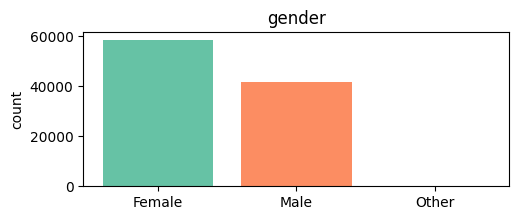

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64


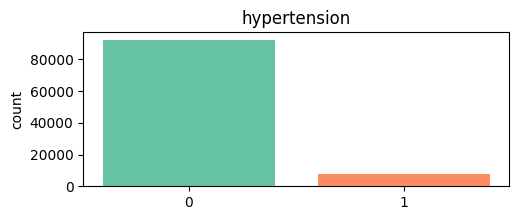

hypertension
0    92515
1     7485
Name: count, dtype: int64


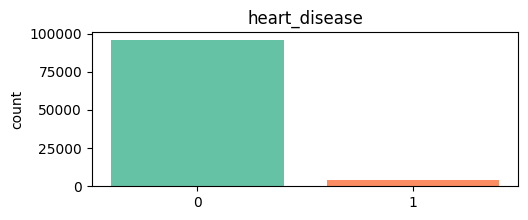

heart_disease
0    96058
1     3942
Name: count, dtype: int64


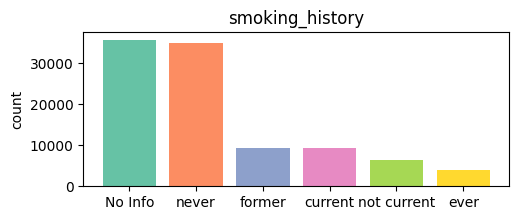

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64


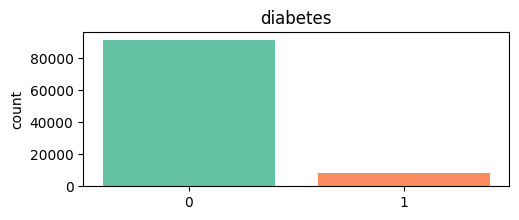

diabetes
0    91500
1     8500
Name: count, dtype: int64


In [170]:
category1 = ["gender","hypertension","heart_disease","smoking_history","diabetes"]
for c in category1:
    bar_plot(c)

### Numerical variables
age, bmi, HbA1c_level, blood_glucose_level

In [171]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(df[variable], bins = 40)
    plt.xlabel(variable)
    plt.ylabel("frequency")
    plt.title(variable)
    plt.show()

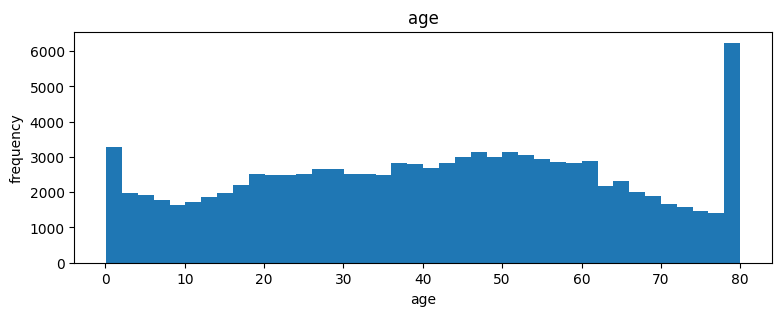

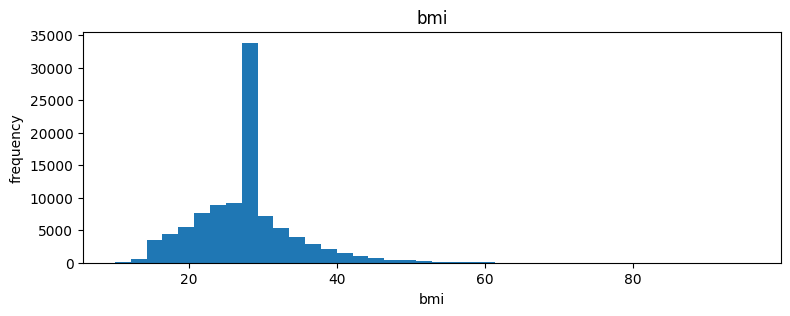

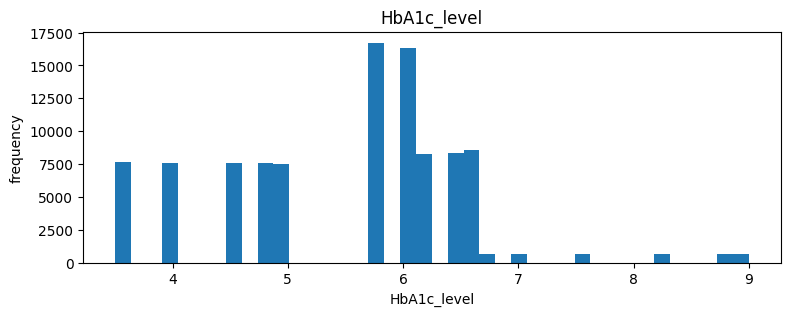

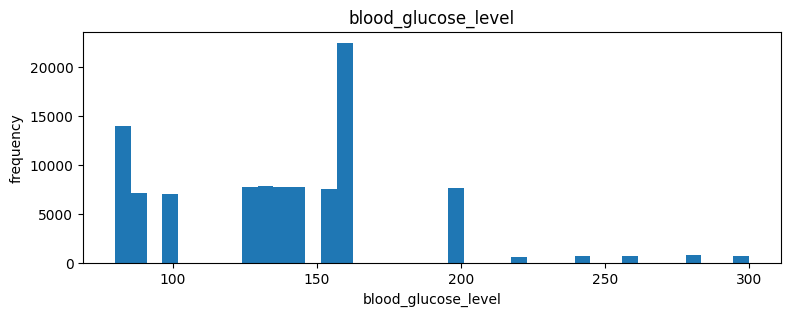

In [172]:
numericVar = ["age","bmi","HbA1c_level", "blood_glucose_level"]
for n in numericVar:
    plot_hist(n)

## Bivariate/Multivariate visualization

In [173]:
def plt_bi_bar(variable):
    plt.figure(figsize=(5, 2))
    sns.countplot(x=df[variable], hue=df['diabetes'], palette='Set2')
    plt.title(f'{variable} and diabetes')
    plt.xlabel(variable)
    plt.ylabel('Count')
    plt.show()

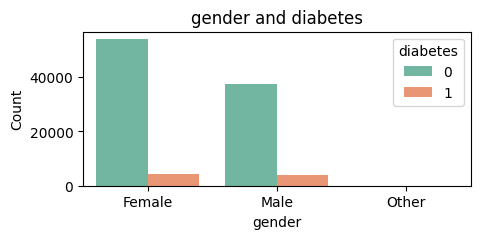

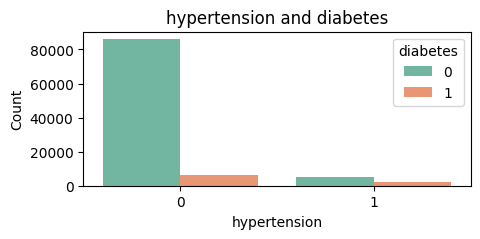

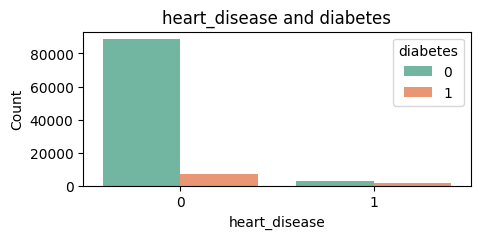

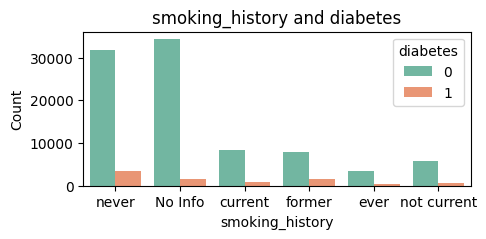

In [174]:
category1 = ["gender","hypertension","heart_disease","smoking_history"]
for c in category1:
    plt_bi_bar(c)

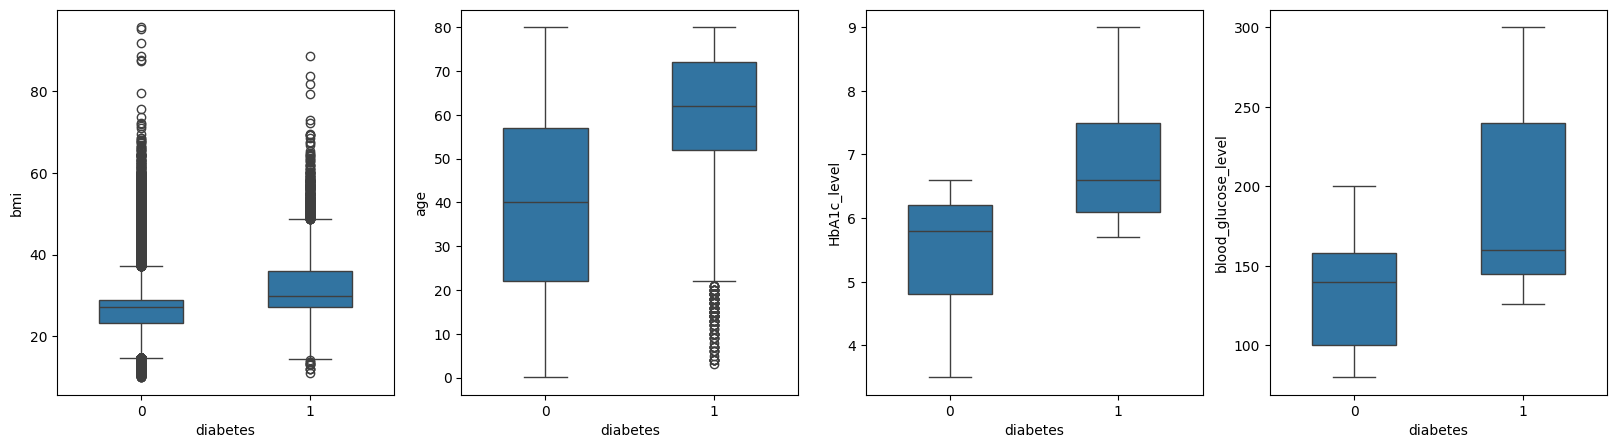

In [175]:
fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (20,5))
sns.boxplot(ax = axes[0],x = "diabetes", y = "bmi", data = df, width=0.5)
sns.boxplot(ax = axes[1],x = "diabetes", y = "age", data = df, width=0.5)
sns.boxplot(ax = axes[2],x = "diabetes", y = "HbA1c_level", data = df, width=0.5)
sns.boxplot(ax = axes[3],x = "diabetes", y = "blood_glucose_level", data = df, width=0.5)
plt.show()
#data engineering(categorize to groups)

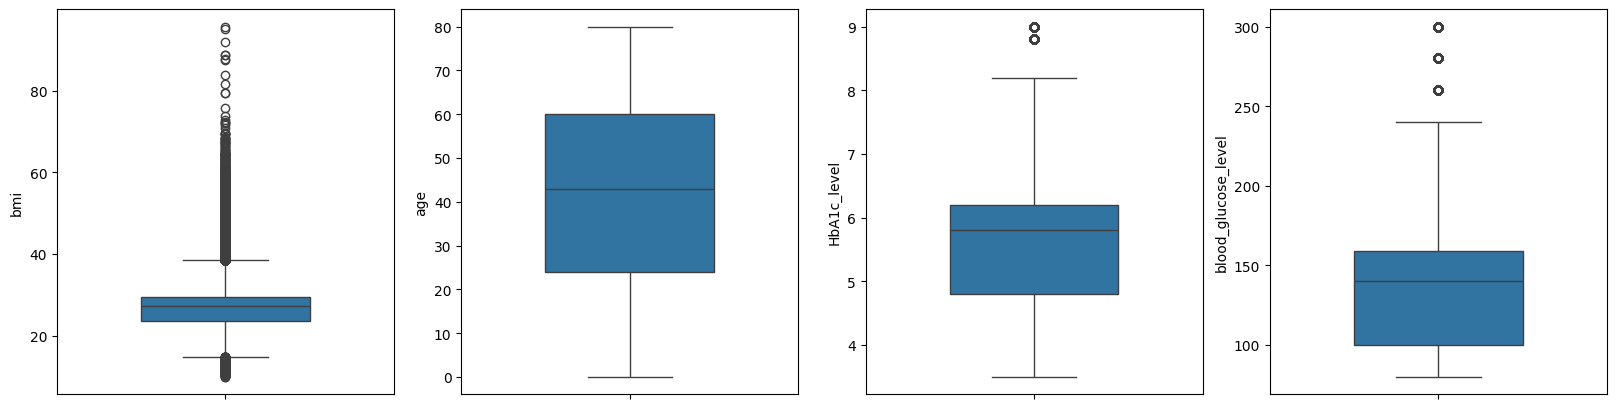

In [176]:
fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (20,5))
sns.boxplot(ax = axes[0], y = "bmi", data = df, width=0.5)
sns.boxplot(ax = axes[1], y = "age", data = df, width=0.5)
sns.boxplot(ax = axes[2], y = "HbA1c_level", data = df, width=0.5)
sns.boxplot(ax = axes[3], y = "blood_glucose_level", data = df, width=0.5)
plt.show()


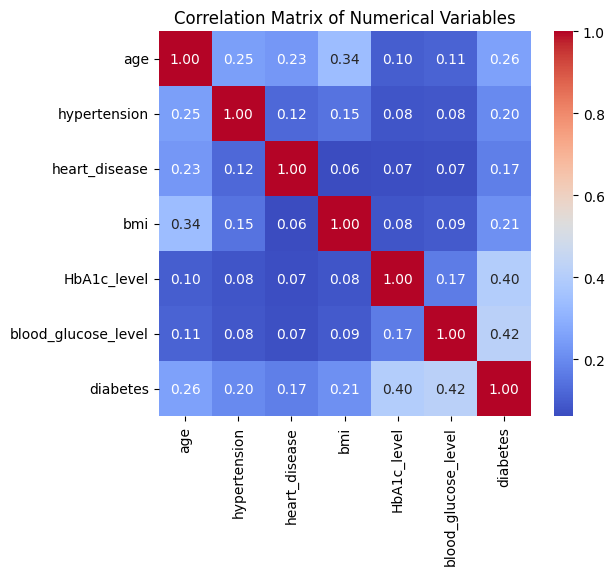

In [177]:
df2=df.drop(['gender','smoking_history'], axis=1, inplace=False)

corr_matrix = df2.corr()
plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")   

plt.title('Correlation Matrix of Numerical Variables')
plt.show()
#feature selection

In [178]:
#convert categorical feature into numerical feature
df2=df.copy()
df2.gender=[1 if i == "Male" else 0 if i == "Female" else -1 for i in df2.gender]
df2.smoking_history=[1 if i=="current" else 2 if i=="former" else 3 if i=="not current" else 4 if i=="ever" else 5 if i=="never" else 0 for i in df2.smoking_history]
df2.head(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,5,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,5,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


### Logistic Regression
without data preprocessing

In [179]:
#Split in 75% train and 25% test set
train_df2, test_df2 = train_test_split(df2, test_size = 0.25, random_state= 42)
 
#Separate target label
y_train = train_df2['diabetes']
y_test = test_df2['diabetes']

#Drop target label
x_train = train_df2.drop(['diabetes'], axis = 1)
x_test = test_df2.drop(['diabetes'], axis = 1)

In [180]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

#build decision tree
logreg_model = LogisticRegression(solver='liblinear', random_state=42)

#fit the tree to diabetes dataset
logreg_model.fit(x_train, y_train)

y_train_pred = logreg_model.predict(x_train)
y_test_pred  = logreg_model.predict(x_test)

In [181]:
from sklearn.model_selection import GridSearchCV


parameters = [{'penalty':['l2']}, 
              {'C':[0.01, 0.1, 10, 100]}]


grid_search = GridSearchCV(estimator = logreg_model,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           verbose=0)

# performing grid search on the training data set
grid_search.fit(x_train, y_train)

GridSearchCV(cv=10,
             estimator=LogisticRegression(random_state=42, solver='liblinear'),
             param_grid=[{'penalty': ['l2']}, {'C': [0.01, 0.1, 10, 100]}],
             scoring='accuracy')

In [182]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_test_pred)

accuracy

0.95872

Train score 0.9608666666666666
Test score 0.95872
Train Confusion matrix
Test Confusion matrix
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     68650
           1       0.89      0.62      0.73      6350

    accuracy                           0.96     75000
   macro avg       0.93      0.80      0.85     75000
weighted avg       0.96      0.96      0.96     75000

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     22850
           1       0.89      0.60      0.71      2150

    accuracy                           0.96     25000
   macro avg       0.92      0.79      0.85     25000
weighted avg       0.96      0.96      0.96     25000



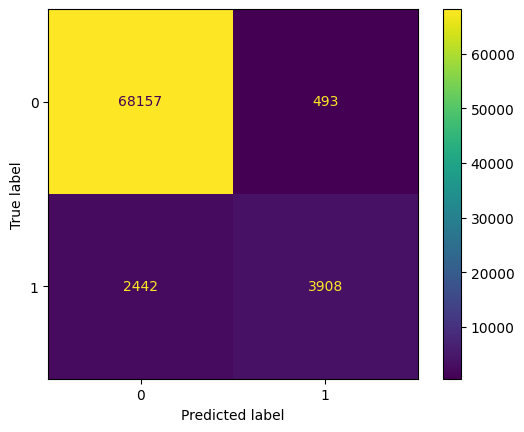

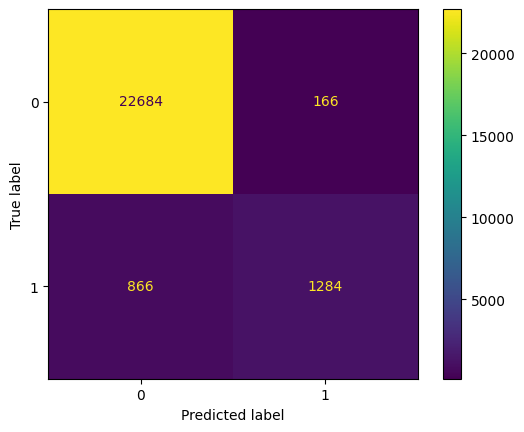

In [183]:
print(f'Train score {accuracy_score(y_train, y_train_pred)}')
print(f'Test score {accuracy_score(y_test, y_test_pred)}')
plot_confusionmatrix(y_train, y_train_pred,dom='Train')
plot_confusionmatrix(y_test, y_test_pred,dom='Test')
print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

Oversampling

In [184]:
from imblearn.over_sampling import RandomOverSampler

In [185]:
#1-Random Over Sampler
oversample = RandomOverSampler(random_state=42)
x_ROS , y_ROS = oversample.fit_resample(X,Y)
newdf = pd.DataFrame(x_ROS); newdf["diabetes"]=y_ROS

print(newdf.shape)

(182964, 9)


In [186]:
# We shall use GridSearchCV with CrossValidation in order to determine the best hyperparameter
from sklearn.model_selection import GridSearchCV


parameters = [{'penalty':['l2']}, 
              {'C':[0.01, 0.1, 10, 100]}]


grid_search = GridSearchCV(estimator = logreg_model,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           verbose=0)

# performing grid search on the training data set
grid_search.fit(x_train, y_train)

GridSearchCV(cv=10,
             estimator=LogisticRegression(random_state=42, solver='liblinear'),
             param_grid=[{'penalty': ['l2']}, {'C': [0.01, 0.1, 10, 100]}],
             scoring='accuracy')

In [187]:
#Split in 75% train and 25% test set
train_newdf, test_newdf = train_test_split(newdf, test_size = 0.25, random_state= 42)
 
#Separate target label
y_train = train_newdf['diabetes']
y_test = test_newdf['diabetes']

#Drop target label
x_train = train_newdf.drop(['diabetes'], axis = 1)
x_test = test_newdf.drop(['diabetes'], axis = 1)

In [188]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

#build decision tree
logreg_model = LogisticRegression(solver='liblinear', random_state=42)

#fit the tree to diabetes dataset
logreg_model.fit(x_train, y_train)

y_train_pred = logreg_model.predict(x_train)
y_test_pred  = logreg_model.predict(x_test)

/Users/orangey/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train score 0.8639732406375025
Test score 0.8642574495529175
Train Confusion matrix
Test Confusion matrix
              precision    recall  f1-score   support

           0       0.86      0.87      0.86     68701
           1       0.87      0.86      0.86     68522

    accuracy                           0.86    137223
   macro avg       0.86      0.86      0.86    137223
weighted avg       0.86      0.86      0.86    137223

              precision    recall  f1-score   support

           0       0.86      0.86      0.86     22781
           1       0.87      0.86      0.86     22960

    accuracy                           0.86     45741
   macro avg       0.86      0.86      0.86     45741
weighted avg       0.86      0.86      0.86     45741



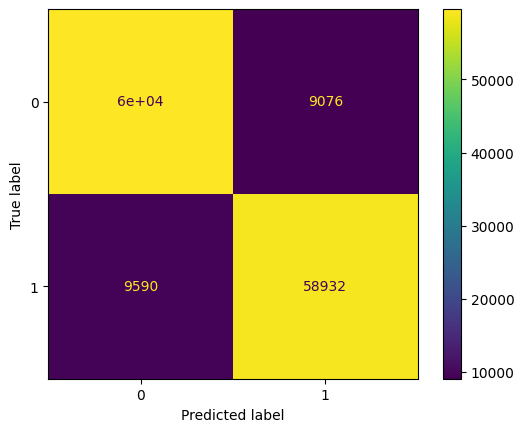

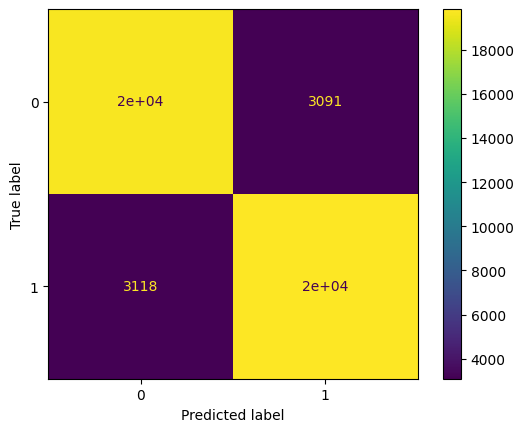

In [189]:
model.fit(x_train,y_train)
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

print(f'Train score {accuracy_score(y_train, y_train_pred)}')
print(f'Test score {accuracy_score(y_test, y_test_pred)}')
plot_confusionmatrix(y_train, y_train_pred,dom='Train')
plot_confusionmatrix(y_test, y_test_pred,dom='Test')
print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))